<center>Jaemin Son, 2018320192</center><br>

# Basic probability theory

In [1]:
import torch
from torch.distributions.multinomial import Multinomial

from IPython import display

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
probabilities = torch.ones([6], dtype = torch.float64) / 6
distribution = Multinomial(total_count = 1, probs = probabilities)
distribution.sample()

tensor([0., 0., 0., 1., 0., 0.], dtype=torch.float64)

In [3]:
print((Multinomial(total_count = 10, probs = probabilities)).sample())
print((Multinomial(total_count = 10000, probs = probabilities)).sample())

tensor([4., 1., 1., 1., 2., 1.], dtype=torch.float64)
tensor([1696., 1614., 1676., 1685., 1676., 1653.], dtype=torch.float64)


In [4]:
num_rolls = 1000
rolls = Multinomial(total_count = 1, probs = probabilities)
counts = torch.zeros(6, num_rolls, dtype = torch.double)
totals = torch.zeros(6, dtype = torch.double)
for i in range(num_rolls):
   totals = totals + rolls.sample()
   counts[:, i] = totals

In [5]:
totals / num_rolls

tensor([0.1730, 0.1860, 0.1620, 0.1650, 0.1570, 0.1570], dtype=torch.float64)

In [6]:
counts

tensor([[  1.,   1.,   2.,  ..., 172., 172., 173.],
        [  0.,   0.,   0.,  ..., 186., 186., 186.],
        [  0.,   1.,   1.,  ..., 161., 162., 162.],
        [  0.,   0.,   0.,  ..., 165., 165., 165.],
        [  0.,   0.,   0.,  ..., 157., 157., 157.],
        [  0.,   0.,   0.,  ..., 157., 157., 157.]], dtype=torch.float64)

In [7]:
x = torch.arange(num_rolls, dtype = torch.double).reshape((1, num_rolls)) + 1
estimates = counts / x
print(estimates[:, 0])
print(estimates[:, 1])
print(estimates[:, 100])

tensor([1., 0., 0., 0., 0., 0.], dtype=torch.float64)
tensor([0.5000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000], dtype=torch.float64)
tensor([0.1782, 0.1485, 0.1485, 0.1485, 0.1782, 0.1980], dtype=torch.float64)


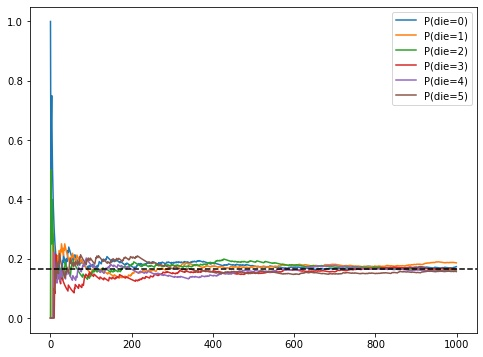

In [8]:
display.set_matplotlib_formats('jpg')

plt.figure(figsize=(8, 6))
for i in range(6):
   plt.plot(estimates[i, :].numpy(), label = ("P(die=" + str(i) + ")"))

plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

# Sampling

In [9]:
import random

for i in range(10):
   print(random.random())

0.7774286595896818
0.30315020377594315
0.9012779998907656
0.8801049468798324
0.40633672424709144
0.2201065921135158
0.7920311401607091
0.6326210024203199
0.9744995434907887
0.44876163284275983


# Uniform Distribution

In [10]:
for i in range(10):
   print(random.randint(1, 100))

95
7
34
29
3
77
56
75
65
3


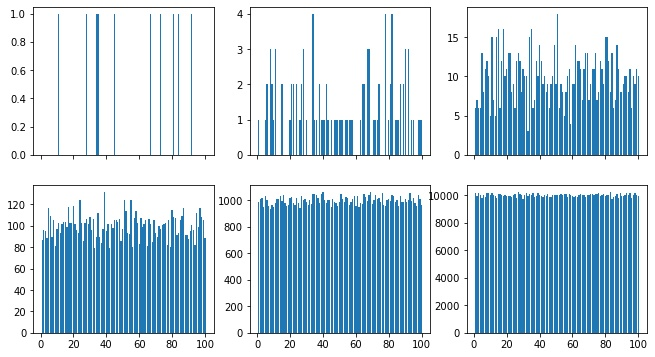

In [11]:
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(11, 6), sharex=True)
axes = axes.reshape(6)

for i in range(1, 1000001):
   counts[random.randint(0, 99)] += 1
   if i in [10, 100, 1000, 10000, 100000, 1000000]:
      axes[int(math.log10(i)) - 1].bar(np.arange(1, 101), counts)
plt.show()

# The categorical distribution

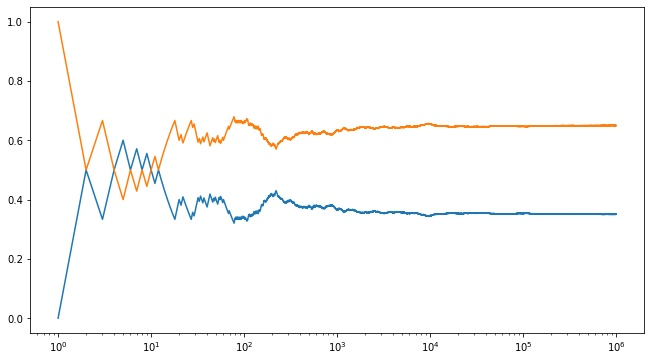

In [12]:
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n + 1)

p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(11, 6))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

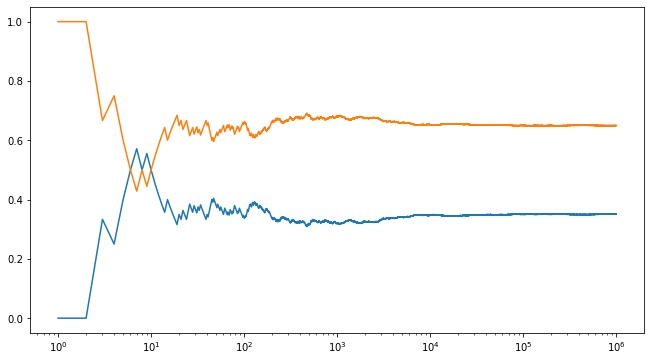

In [13]:
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n + 1)

p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(11, 6))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

# The Normal distribution

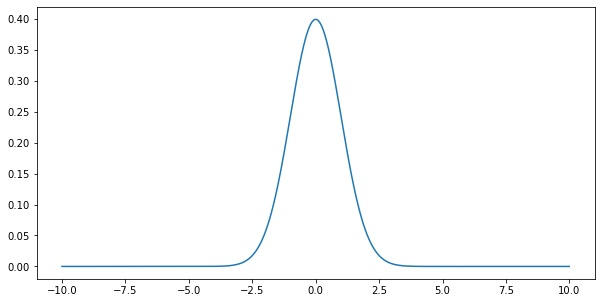

In [14]:
x = np.arange(-10, 10, 0.01)
p = (1/math.sqrt(2 * math.pi)) * np.exp(-0.5 * x**2)
plt.figure(figsize=(10, 5))
plt.plot(x, p)
plt.show()

mean 0.9, variance0.49


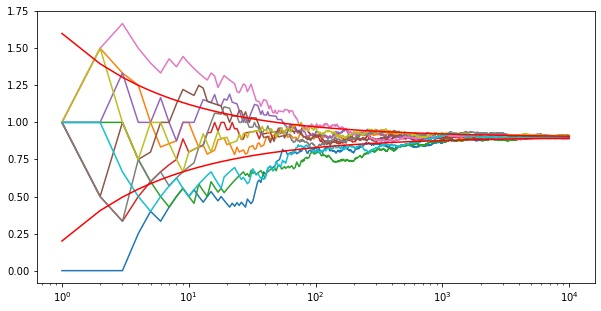

In [15]:
tmp = np.random.uniform(size=(10000,10))
x = 1.0 * (tmp > 0.3) + 1.0 * (tmp > 0.8)
mean = 1 * 0.5 + 2 * 0.2
variance = 1 * 0.5 + 4 * 0.2 - mean**2
print('mean {}, variance{}'.format(mean, variance))

y = np.arange(1, 10001).reshape(10000,1)
z = np.cumsum(x,axis=0) / y

plt.figure(figsize=(10,5))
for i in range(10):
   plt.semilogx(y,z[:,i])

plt.semilogx(y,(variance**0.5) * np.power(y,-0.5) + mean,'r')
plt.semilogx(y,-(variance**0.5) * np.power(y, -0.5) + mean,'r')
plt.show()